```{contents}
```

# Cost Function

The **goal of K-Means** is to partition the dataset into $K$ clusters such that points within each cluster are as similar as possible (intra-cluster similarity is high) and as dissimilar as possible from other clusters (inter-cluster separation is high).

To formalize this, K-Means uses a **cost function** called the **Sum of Squared Errors (SSE)** or **Within-Cluster Sum of Squares (WCSS)**.

---

## 1. **Within-Cluster Sum of Squares (WCSS / Inertia)**

The main cost function is:

$$
J = \sum_{k=1}^K \sum_{x_i \in C_k} \| x_i - \mu_k \|^2
$$

where:

* $K$ = number of clusters
* $C_k$ = set of points assigned to cluster $k$
* $x_i$ = data point
* $\mu_k$ = centroid of cluster $k$
* $\| x_i - \mu_k \|^2$ = squared Euclidean distance between point and cluster centroid

👉 This means K-Means tries to minimize the **squared distance of each point to its cluster center**.

---

## 2. **Between-Cluster Separation (Optional, Not Explicit in Vanilla K-Means)**

Though not explicitly optimized by K-Means, ideally clusters should also be **well-separated**. A related measure is the **Between-Cluster Sum of Squares (BCSS)**:

$$
BCSS = \sum_{k=1}^K n_k \cdot \| \mu_k - \mu \|^2
$$

where:

* $n_k$ = number of points in cluster $k$
* $\mu$ = global mean of all points

👉 A good clustering should have **low WCSS (compact clusters)** and **high BCSS (well-separated clusters)**.

---

## 3. **Objective in Optimization**

* **Vanilla K-Means** → minimizes **WCSS** only.
* **Implicitly** → this indirectly improves BCSS, because minimizing intra-cluster variance generally increases inter-cluster separation.

---

## Intuition Behind the Cost Function

* If all points are very close to their centroids → $J$ is small → good clustering.
* If points are scattered far from centroids → $J$ is large → poor clustering.
* K-Means works by iteratively reassigning points and updating centroids to **reduce $J$ at every step** until convergence.

---

So the **main cost function in K-Means** is:

**Sum of Squared Distances of points to their nearest centroid (WCSS)**.

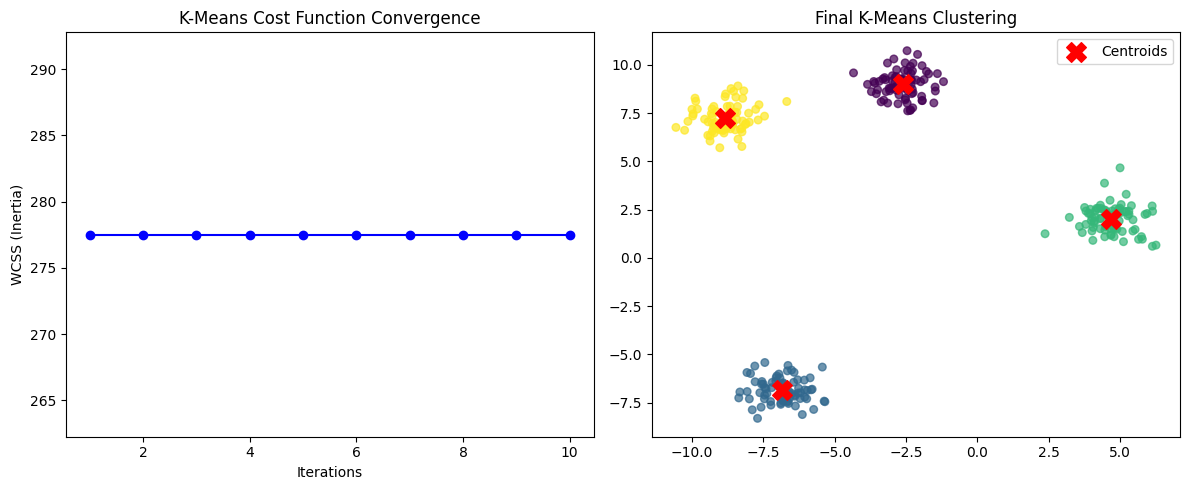

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 1. Generate synthetic dataset
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.7, random_state=42)

# 2. Run KMeans with different iterations to track cost (WCSS)
kmeans = KMeans(n_clusters=4, init="random", n_init=1, max_iter=1, random_state=42)

# Store inertia (WCSS) per iteration
costs = []

# Run manually for multiple iterations
for i in range(1, 11):  # 10 iterations
    kmeans.max_iter = i
    kmeans.fit(X)
    costs.append(kmeans.inertia_)  # inertia_ = WCSS

# 3. Final clustering with 4 clusters for visualization
final_kmeans = KMeans(n_clusters=4, random_state=42)
final_kmeans.fit(X)
y_pred = final_kmeans.predict(X)

# 4. Plot
plt.figure(figsize=(12,5))

# Plot cost function over iterations
plt.subplot(1,2,1)
plt.plot(range(1,11), costs, marker="o", color="blue")
plt.xlabel("Iterations")
plt.ylabel("WCSS (Inertia)")
plt.title("K-Means Cost Function Convergence")

# Plot final clustered data
plt.subplot(1,2,2)
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap="viridis", s=30, alpha=0.7)
plt.scatter(final_kmeans.cluster_centers_[:,0], final_kmeans.cluster_centers_[:,1], 
            c="red", s=200, marker="X", label="Centroids")
plt.title("Final K-Means Clustering")
plt.legend()

plt.tight_layout()
plt.show()
